## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the country-data.csv dataset
country_df = pd.read_csv('country-data.csv')

print('Data:')
print(country_df.head(), end='\n\n')

Data:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  



In [4]:
# Check the shape
print('Shape of the dataset:', country_df.shape, end='\n\n')

Shape of the dataset: (167, 10)



In [5]:
# Check datatypes & counts
print('Data types and counts:')
print(country_df.dtypes, end='\n\n')

Data types and counts:
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object



In [6]:
# Get descriptive statistics
print('Descriptive statistics:')
print(country_df.describe(), end='\n\n')

Descriptive statistics:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000   

In [7]:
# Identify any missing data
print('Missing data:')
print(country_df.isnull().sum(), end='\n\n')

Missing data:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
country_df = country_df.select_dtypes(include=[np.number])
print('Data:')
print(country_df.head(), end='\n\n')

Data:
   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200  



<Axes: >

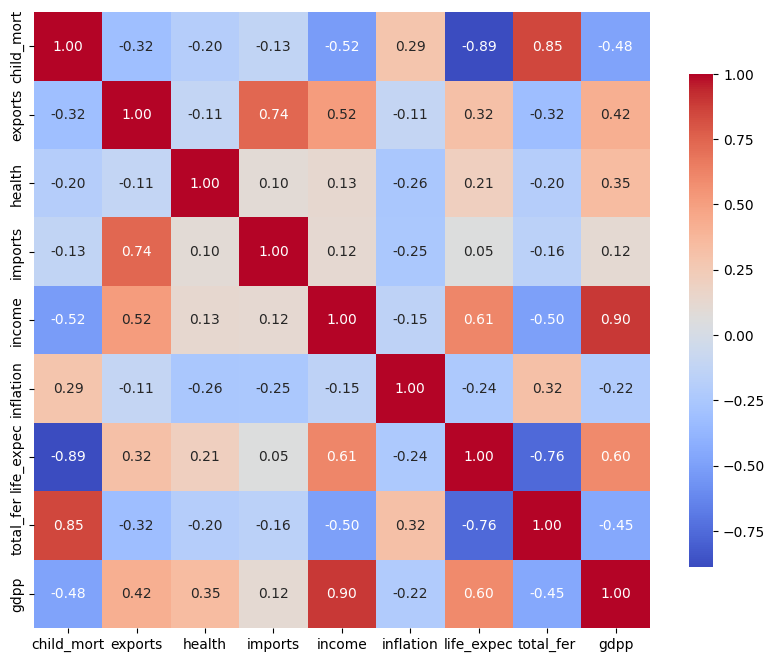

In [9]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(country_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

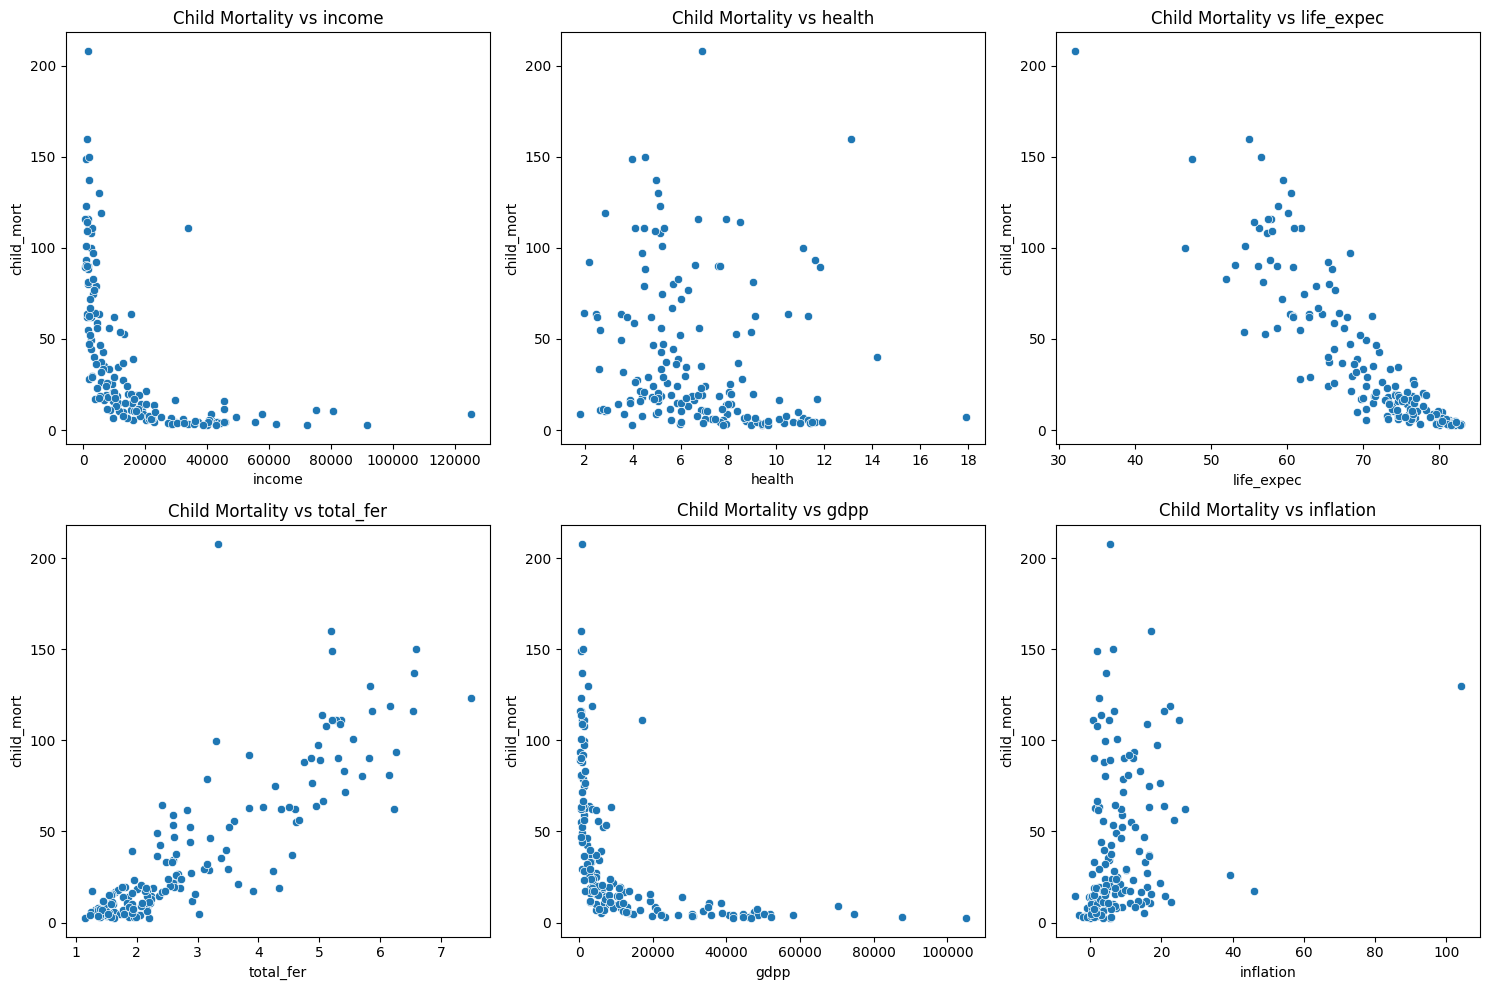

In [ ]:
# Explore the continuous independent features against child_mort using scatter plots.

fig, axes = plt.subplots(2, 3, figsize=(15, 10))    # Create a 2x3 grid of subplots
columns = ['income', 'health', 'life_expec', 'total_fer', 'gdpp', 'inflation']  # List of columns to plot

for col, ax in zip(columns, axes.flatten()):    # Iterate through columns and axes (having been flattened into a 1D array)
    sns.scatterplot(data=country_df, x=col, y='child_mort', ax=ax)
    ax.set_title(f'Child Mortality vs {col}')

plt.tight_layout()
plt.show()

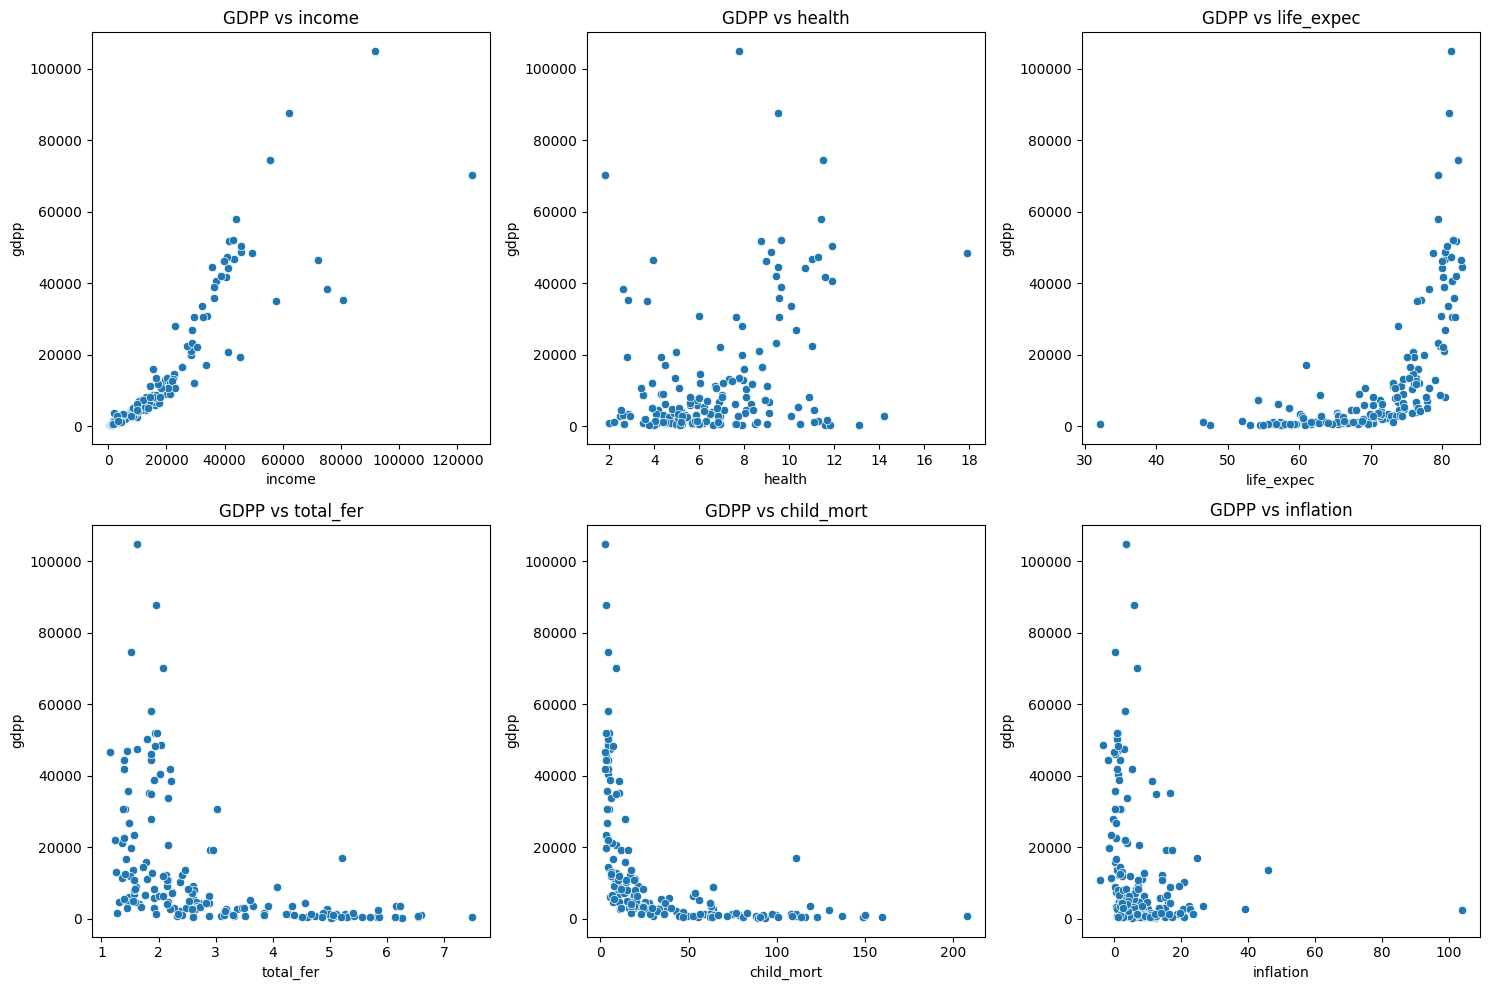

In [19]:
# Explore the continuous independent features against gdpp using scatter plots.

fig, axes = plt.subplots(2, 3, figsize=(15, 10))    # Create a 2x3 grid of subplots
columns = ['income', 'health', 'life_expec', 'total_fer', 'child_mort', 'inflation']  # List of columns to plot

for col, ax in zip(columns, axes.flatten()):    # Iterate through columns and axes (having been flattened into a 1D array)
    sns.scatterplot(data=country_df, x=col, y='gdpp', ax=ax)
    ax.set_title(f'GDPP vs {col}')

plt.tight_layout()
plt.show()

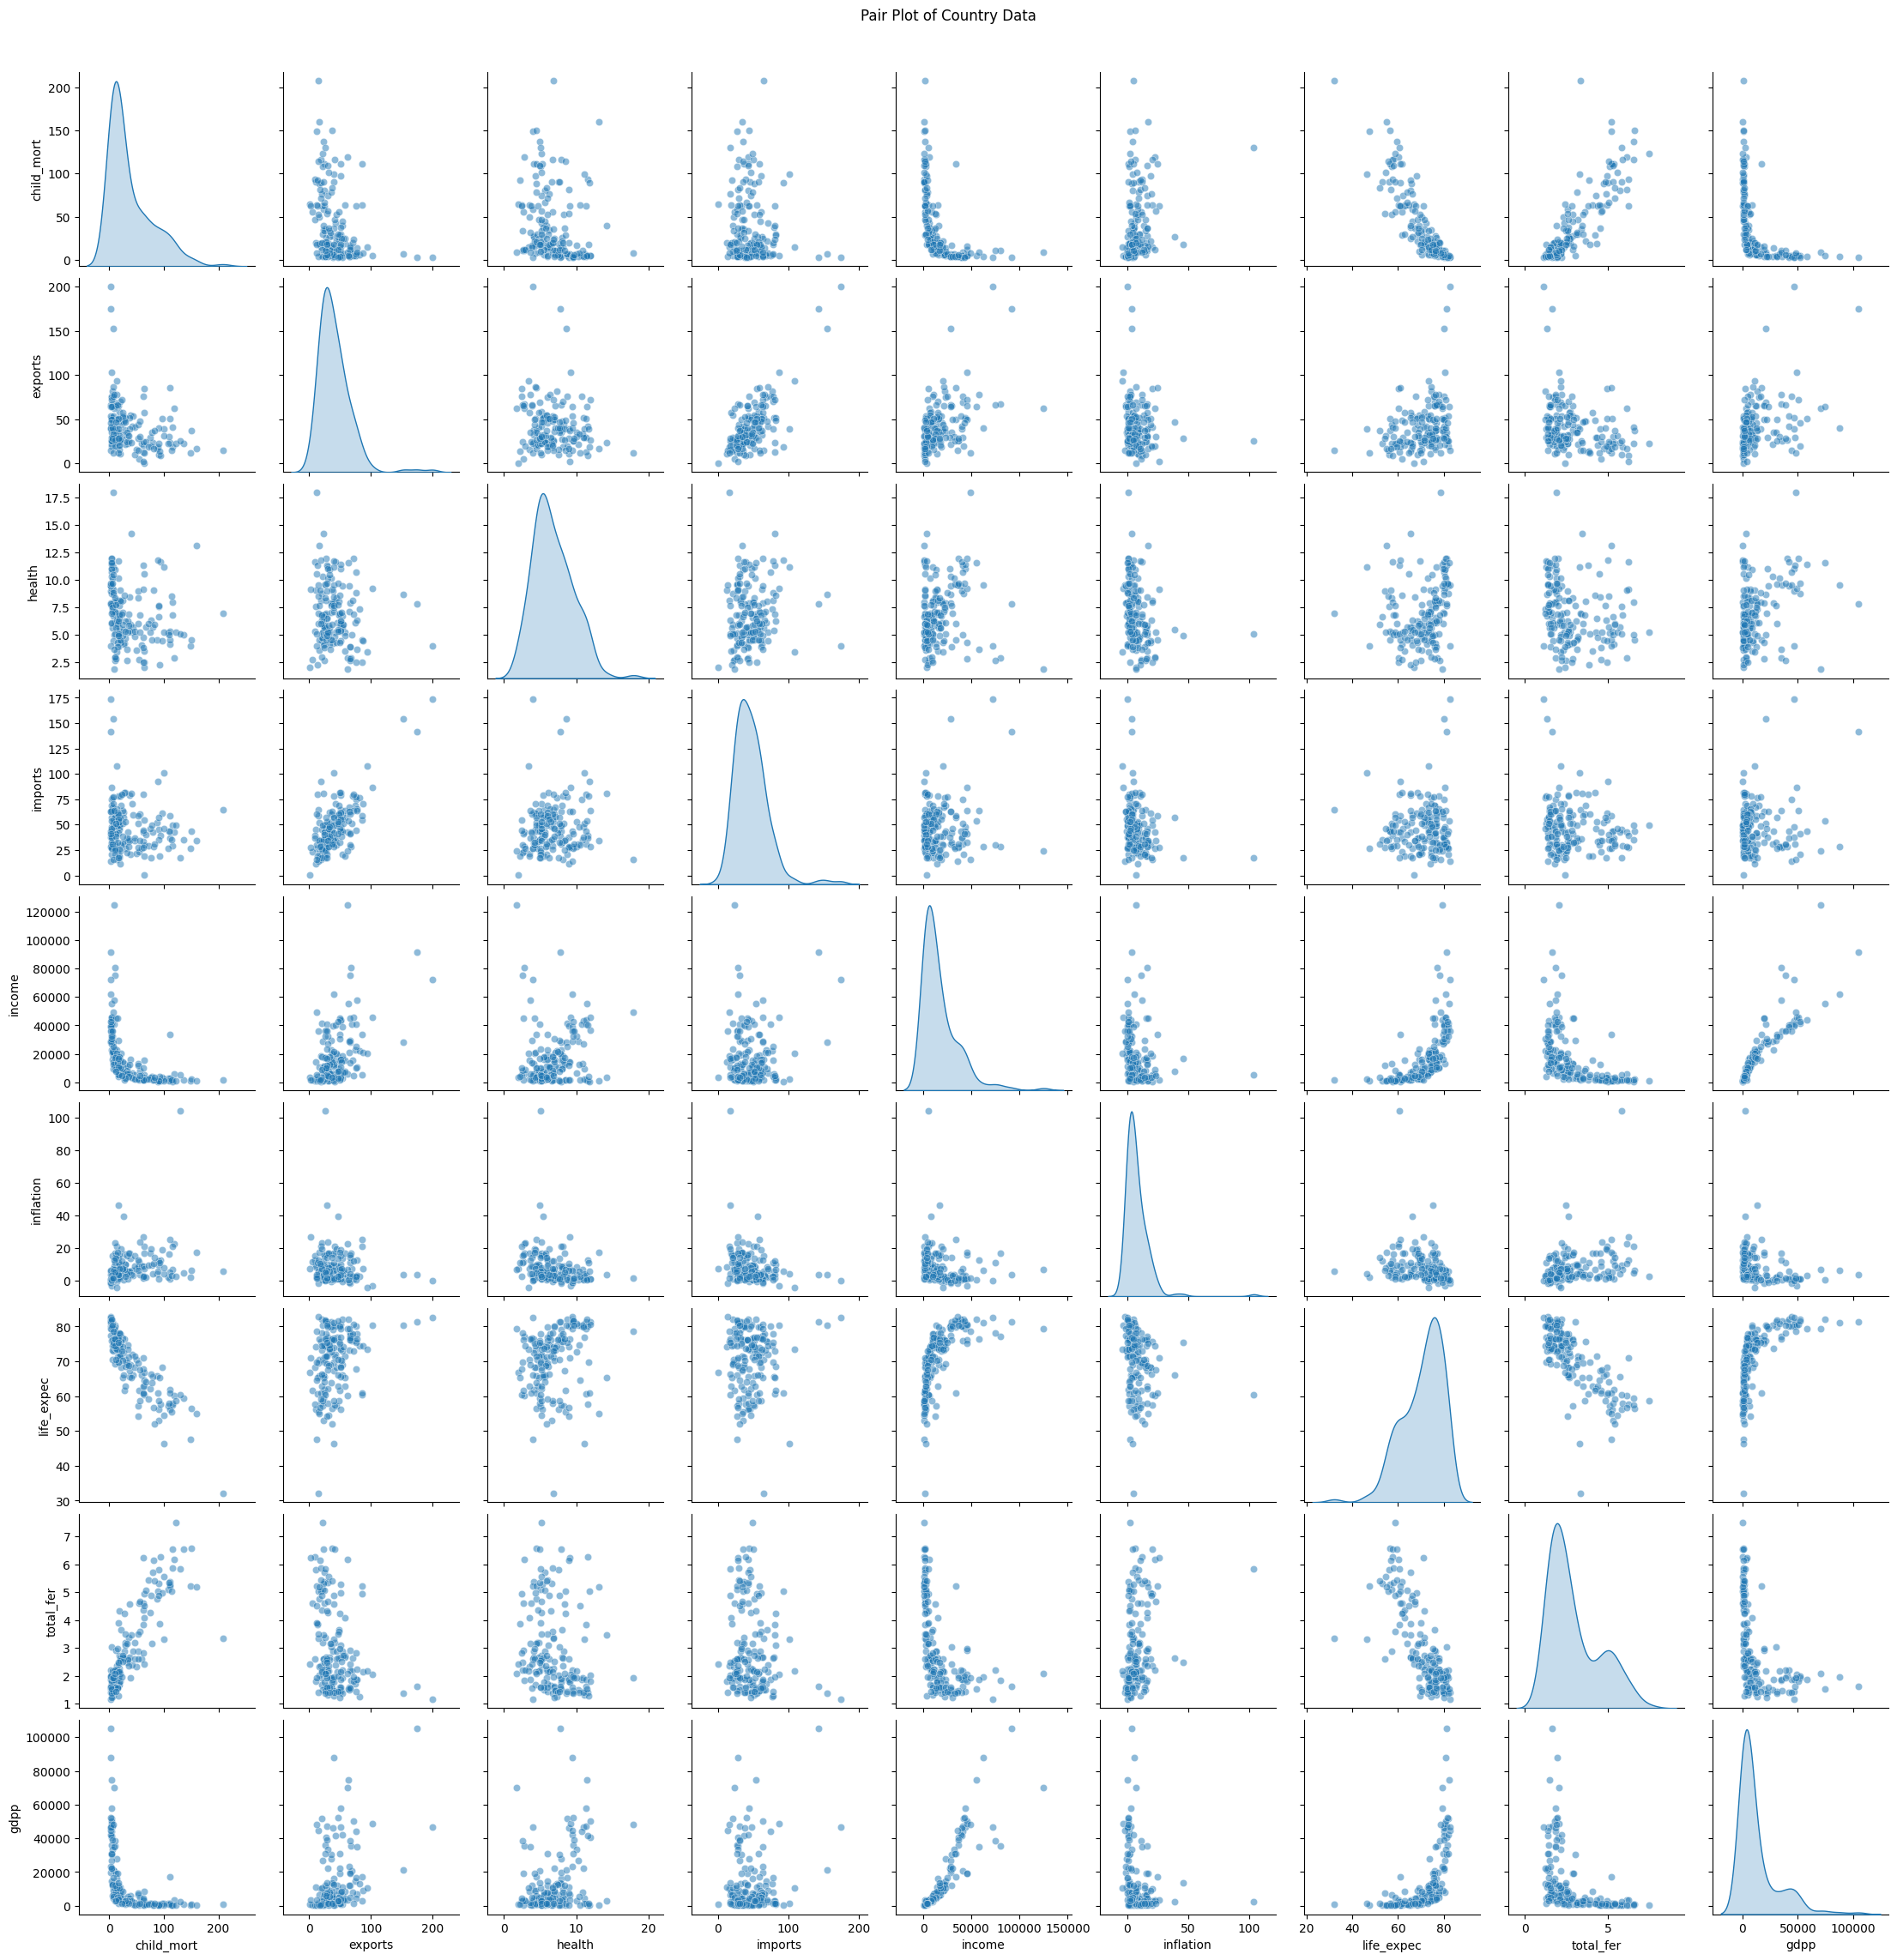

In [25]:
# Create a pair plot
# Hint: Explore seaborn pairplot

sns.pairplot(country_df, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Country Data', y=1.02)  # Adjust title position
plt.show()

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [ ]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(country_df), columns=country_df.columns)

# Display the first few rows of the scaled dataframe
print('Scaled Data:')
print(df_scaled.head(), end='\n\n')

Scaled Data:
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242  



## K-Means Clustering

### Selecting K

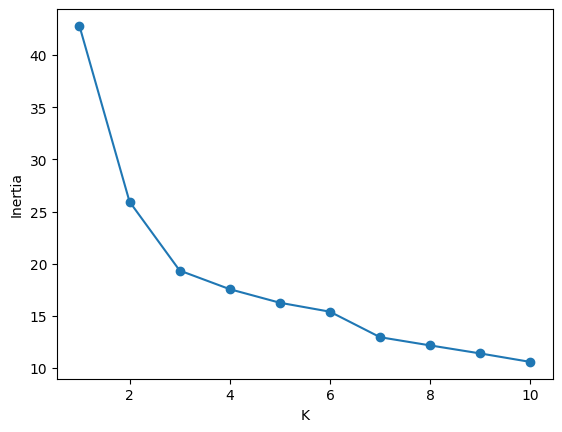

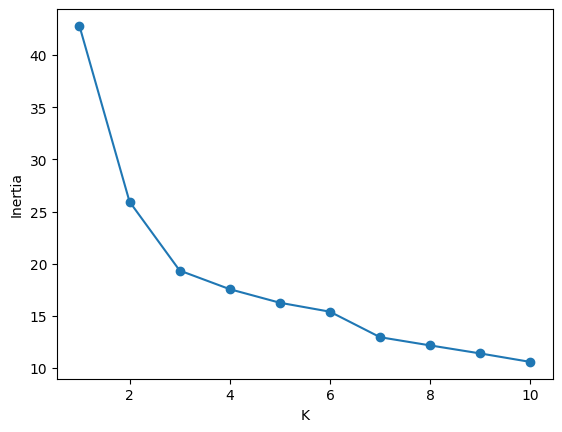

In [55]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Plot elbow curve using scaled dataset
def eval_scaled_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_scaled_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

# Call the elbow function
elbow_Kmeans(df_scaled, max_k=10, r=rseed)

# Call the elbow function for scaled data
elbow_scaled_Kmeans(df_scaled, max_k=10, r=rseed)

Looking at the Elbow curve suggests the ideal number of clusters using either original or normalised data remains K = 3

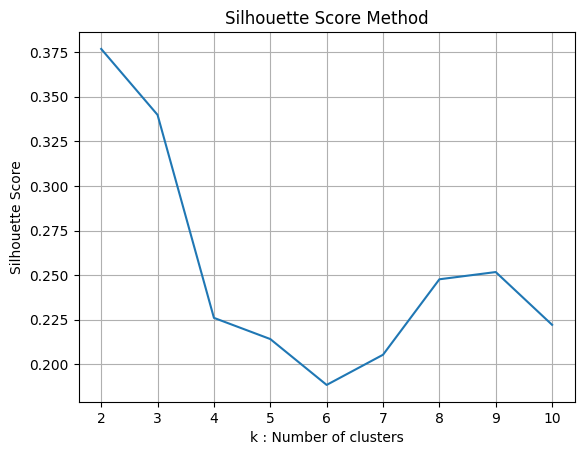

In [56]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method I believe the optimal value for K is 3.<br><br>

Whilst K = 2 would provide more distinct clusters there is a risk that this model is too simplistic and misses some of the nuances in the data<br><br>

K = 3 would provide less distinct clustering but would provide the opportunity for more detailed interpretation

## Fitting a K-Means Model with the selected K value

In [ ]:
# Fit the K-Means model using the selected value of k (= 3)
# Remember to set the random_state to rseed
k = 3  # Set the number of clusters based on the elbow curve and silhouette score
kmeans = KMeans(n_clusters=k, random_state=rseed)

# Fit the model to the scaled data
kmeans.fit(df_scaled)

# Get the cluster labels
labels = kmeans.labels_

In [64]:
# Count the number of records in each cluster
cluster_counts = pd.Series(labels).value_counts().sort_index()
# Print the cluster counts
print('Cluster Counts:')
print(cluster_counts, end='\n\n')

Cluster Counts:
0    87
1    35
2    45
Name: count, dtype: int64



In [89]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, labels)
print(f'Silhouette Coefficient for {k} clusters: {silhouette_avg:.4f}', end='\n\n')

# Add the cluster labels to the original dataframe
country_df['Cluster'] = labels

# Map the labels to a meanignful name
cluster_names = {0: 'Developing', 1: 'Developed', 2: 'Undeveloped'}
country_df['Cluster'] = country_df['Cluster'].map(cluster_names)

# Display the first few rows of the dataframe with cluster labels
print('Data with Cluster Labels:')
print(country_df.head(), end='\n\n')

Silhouette Coefficient for 3 clusters: 0.3398

Data with Cluster Labels:
   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp      Cluster  
0       5.82    553  Undeveloped  
1       1.65   4090   Developing  
2       2.89   4460   Developing  
3       6.16   3530  Undeveloped  
4       2.13  12200   Developing  



## Predictions

In [90]:
# Add the predicted cluster label column to the original dataframe


As K-Means is an unsupervised learning algorithm, we do not have true labels to compare against so cluster labels and predcited labels will be the same.

## Visualisation of clusters

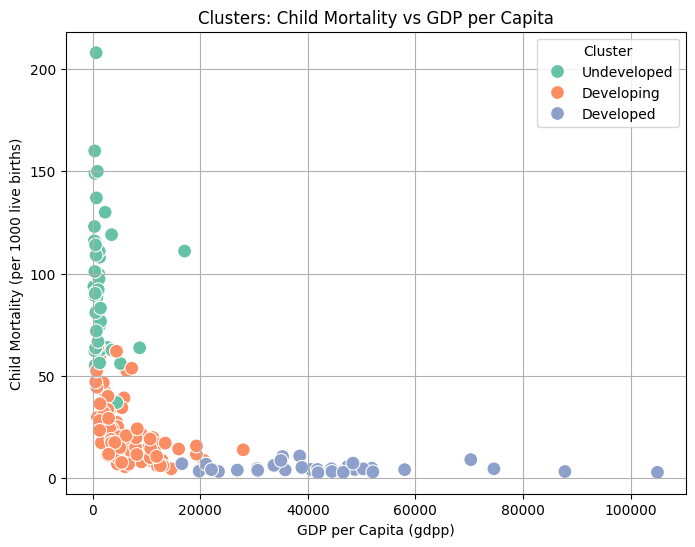

In [91]:
# Visualisation of clusters: child mortality vs gdpp

plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_df, x='gdpp', y='child_mort', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters: Child Mortality vs GDP per Capita')
plt.xlabel('GDP per Capita (gdpp)')
plt.ylabel('Child Mortality (per 1000 live births)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

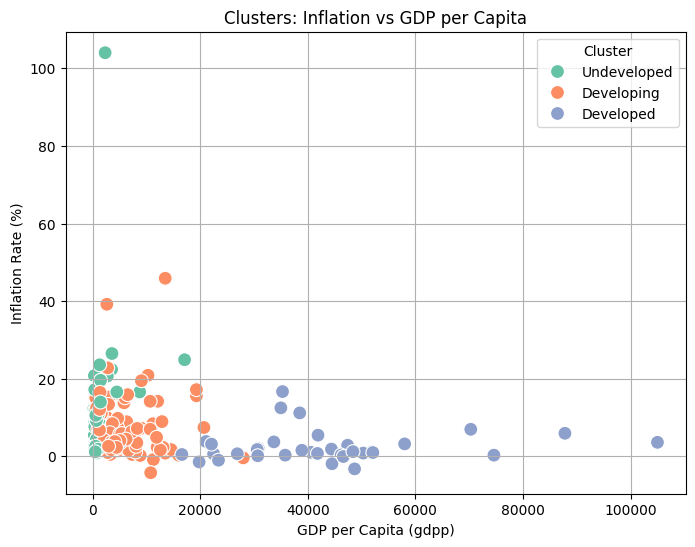

In [92]:
# Visualisation of clusters: inflation vs gdpp

plt.figure(figsize=(8, 6))
sns.scatterplot(data=country_df, x='gdpp', y='inflation', hue='Cluster', palette='Set2', s=100)
plt.title('Clusters: Inflation vs GDP per Capita')
plt.xlabel('GDP per Capita (gdpp)')
plt.ylabel('Inflation Rate (%)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**<br>

I have labelled the clusters as 'Undeveloped', 'Developing' and 'Developed' for the following reasons:<br>
- 'Undeveloped' = High child mortality and high inflation vs low GDP per capita
- 'Developing' = medium to low child mortality and inflation vs low to medium (increasing) GDP per capita
- 'Developed' = very low child mortality vs medium to high GDP per capita and medium to negative inflation vs medium to high GDP per capita